In [153]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [154]:
#create some fake data to play with
import pandas
from faker import Factory
import random

In [155]:
faker = Factory.create()

def fakerecord():
    return {'store': faker.numerify('####'),  # random number eg:235533
            'drug': faker.numerify('###########'), 
            'fraud_tag': faker.numerify('#'),# random cities
            'shipment_qty': faker.numerify('###'),  # different products
            'sales_qty': faker.numerify('###'),  # different categories
            'num_shipments': faker.numerify('##'),  # random metro cities
            'num_adjustments': faker.numerify('##')  # id's eg:1,20,28,27
            }

example_dummy_data = pandas.DataFrame([fakerecord() for _ in range(1000)])

In [156]:
#view the dummy data
example_dummy_data.head()

,drug,fraud_tag,num_adjustments,num_shipments,sales_qty,shipment_qty,store
0,89300291398,7,11,29,983,286,6518
1,13631013752,0,77,75,982,476,5616
2,68834540979,0,49,27,788,718,8897
3,82956690746,0,38,71,956,157,3607
4,27860177441,7,01,37,641,777,4314


In [157]:
#change the fraud tag to a binary
example_dummy_data['fraud_tag'] = np.where(example_dummy_data['fraud_tag']=='1', '1', '0')

In [158]:
#faker creates strings so force the values to numeric
example_dummy_data = example_dummy_data.apply(pd.to_numeric)

In [159]:
# split data into X and y
Y = example_dummy_data[[1]]
example_dummy_data.drop(example_dummy_data.columns[[1]],axis=1,inplace=True)
X= example_dummy_data

In [160]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model on training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
preds = model.predict(X_test)
predictions = [round(value) for value in preds]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.635981
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.588492
[2]	validation_0-logloss:0.550578
[3]	validation_0-logloss:0.5189
[4]	validation_0-logloss:0.492344
[5]	validation_0-logloss:0.470058
[6]	validation_0-logloss:0.451537
[7]	validation_0-logloss:0.43539
[8]	validation_0-logloss:0.422307
[9]	validation_0-logloss:0.411023
[10]	validation_0-logloss:0.401193
[11]	validation_0-logloss:0.393893
[12]	validation_0-logloss:0.38716
[13]	validation_0-logloss:0.382131
[14]	validation_0-logloss:0.376593
[15]	validation_0-logloss:0.371803
[16]	validation_0-logloss:0.368609
[17]	validation_0-logloss:0.365757
[18]	validation_0-logloss:0.36416
[19]	validation_0-logloss:0.362202
[20]	validation_0-logloss:0.360336
[21]	validation_0-logloss:0.359179
[22]	validation_0-logloss:0.357943
[23]	validation_0-logloss:0.357198
[24]	validation_0-logloss:0.3563
[25]	validation_0-logloss:0.355203
[26]	validation_0-logloss:0.355183
[27]

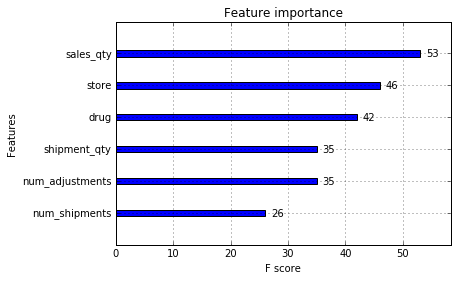

In [161]:
#feature importance 
plot_importance(model)
pyplot.show()

In [162]:
#probability values of being in class 0 or 1
preds = model.predict_proba(X_test)
check1 = pd.DataFrame(preds).rename(columns={1:'div_prob'})
print check1.loc[(check1['div_prob']>0),:].head()

          0  div_prob
0  0.827454  0.172546
1  0.921837  0.078163
2  0.764109  0.235891
3  0.928992  0.071008
4  0.904193  0.095807
